In [2]:
!pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/ab/e0/a52ffc02395474858552ca6437226e23ad67e25fd85cb387f02e479cfe01/LunarCalendar-0.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/97/dd99fa9c0d9627a7b3c103a00f1566d8193aca8d473884ed258cca82b06f/setuptools_git-1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2c/30/47957d487fff94083bdd17247734c165f12b5ac39a3abd1aa476a93eea6e/PyMeeus-0.3.7.tar.gz
  Running setup.py clean for fbprophet
  Created wheel for holidays: filename=holidays-0.10.4-cp37-none-any.whl size=124781 sha256=f0e456303a9ed01c92f3bf3f321789cbae688d11fc65bafc5c82199cdec6ce64
  Stored in directory: C:\Users\raigo\AppData\Local\pip\Cache\wheels\40\31\ad\edd435075e126fb806bd4dcc6af1c4b5554e53c7562602b51d
  Created wheel for pymeeus: filename=PyMeeus-0.3.7-cp37-none-any.whl size=702881 sha256=e02dc1a8a6beb8ed0ae51ab1c3e35ca7481053e3c9687421cab6af07f7d7fac1
  Stored in directory: C:\Users\raigo\AppData\Local\p

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\raigo\\AppData\\Local\\Temp\\pip-install-ly2f04rq\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\raigo\\AppData\\Local\\Temp\\pip-install-ly2f04rq\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\raigo\AppData\Local\Temp\pip-wheel-0du4nc5g' --python-tag cp37
       cwd: C:\Users\raigo\AppData\Local\Temp\pip-install-ly2f04rq\fbprophet\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\raigo\AppData\Local\Temp\pip-i

In [1]:
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

ModuleNotFoundError: No module named 'fbprophet'

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
df = pd.read_csv("data/avocado.csv")

In [3]:
data = df.copy()

In [4]:
data = data.drop(['Unnamed: 0'],axis = 1)

In [5]:
data.Date

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
data.describe(include = 'all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2018-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Roanoke
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [8]:
data["Date"] = pd.to_datetime(data["Date"])
data["month"] = data["Date"].dt.month
data["day"] = data["Date"].dt.day


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')

scatter = go.Scatter(x = data.groupby('Date').mean().index, y = data.groupby('Date').mean().AveragePrice , name = 'avg price')

layout = go.Layout(title = 'Time series plot for mean daily prices for all regions', xaxis ={'title':'Date'}, yaxis = {'title':'Prices'})
figure = go.Figure(data = [scatter], layout = layout)
iplot(figure)

In [10]:
#renaming columns

rename_columns = list(data.columns)
rename_columns = [x.lower() for x in rename_columns]
data.columns = rename_columns
data = data.rename(columns = lambda x: x.replace(' ','_'))

In [11]:
data

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.svm import SVR

#Tranforming categorical values 

def label_enconcode_pre(df):
    if df.dtype == 'object':
        df = LabelEncoder().fit_transform(df)
    return df

data = data.apply(lambda x: label_enconcode_pre(x))

In [13]:
data = pd.get_dummies(data, columns=['year','type','region'], drop_first= True)

In [14]:
data = data.set_index('date')

In [15]:
split_date = '2017-07-30'
data_train = data.loc[data.index <= split_date]
data_test = data.loc[data.index > split_date]

scatter = go.Scatter(x = data_train.groupby('date').mean().index, y = data_train.groupby('date').mean().averageprice , name = 'train')
scatter2 = go.Scatter(x = data_test.groupby('date').mean().index, y = data_test.groupby('date').mean().averageprice, name = 'test')

layout = go.Layout(title = 'Time series plot for mean daily prices for all regions', xaxis ={'title':'Date'}, yaxis = {'title':'Prices'})
figure = go.Figure(data = [scatter, scatter2], layout = layout)
iplot(figure)

In [17]:
# Train / Test split

X_train = data_train.drop(['averageprice'], axis = 1)
y_train = data_train['averageprice']

X_test = data_test.drop(['averageprice'], axis = 1)
y_test = data_test['averageprice']

### XGBoost model 

In [20]:
import xgboost as xgb
print("xgboost", xgb.__version__)

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False, ) # Change verbose to True if you want to see it train

xgboost 1.3.3


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

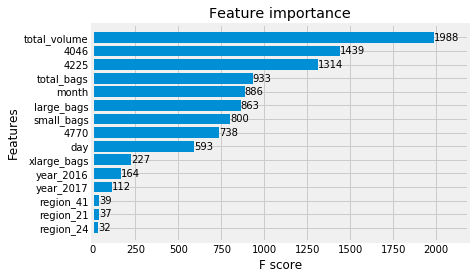

In [21]:
from xgboost import plot_importance, plot_tree
plot_importance(reg, height=0.8, max_num_features=15)

In [22]:
data_test["averageprice_prediction"] = reg.predict(X_test)
data_all = pd.concat([data_test, data_train], sort = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
data_all[['averageprice', 'averageprice_prediction']].sort_values('date')

,averageprice,averageprice_prediction
date,,
2015-01-04,1.75,NaN
2015-01-04,1.83,NaN
2015-01-04,1.22,NaN
2015-01-04,1.64,NaN
2015-01-04,0.89,NaN
...,...,...
2018-03-25,1.21,1.188677
2018-03-25,1.37,1.037628
2018-03-25,1.45,1.316828


In [24]:
scatter = go.Scatter(x = data.groupby('date').mean().index, y = data.groupby('date').mean().averageprice , name = 'actual')
scatter2 = go.Scatter(x = data_all.groupby('date').mean().index, y = data_all.groupby('date').mean().averageprice_prediction, name = 'forecast')

layout = go.Layout(title = 'XGBoost time series forecast', xaxis ={'title':'Date'}, yaxis = {'title':'Prices'})
figure = go.Figure(data = [scatter, scatter2], layout = layout)
iplot(figure)

### Metrics

In [25]:
mse = mean_squared_error(y_true=data_test['averageprice'], y_pred=data_test['averageprice_prediction'])
mae = mean_absolute_error(y_true=data_test['averageprice'], y_pred=data_test['averageprice_prediction'])

print("MAE:", mae, "MSE:",mse)

MAE: 0.20786316818920875 MSE: 0.07615221729286288


### Fine tuning the model  

In [28]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["mae"]
%time reg.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-mae:0.79683	validation_1-mae:0.94564
[1]	validation_0-mae:0.72568	validation_1-mae:0.86880
[2]	validation_0-mae:0.66096	validation_1-mae:0.79700
[3]	validation_0-mae:0.60217	validation_1-mae:0.73336
[4]	validation_0-mae:0.54851	validation_1-mae:0.67587
[5]	validation_0-mae:0.49989	validation_1-mae:0.62115
[6]	validation_0-mae:0.45572	validation_1-mae:0.57210
[7]	validation_0-mae:0.41572	validation_1-mae:0.53014
[8]	validation_0-mae:0.37946	validation_1-mae:0.49585
[9]	validation_0-mae:0.34659	validation_1-mae:0.46118
[10]	validation_0-mae:0.31689	validation_1-mae:0.43007
[11]	validation_0-mae:0.29048	validation_1-mae:0.40273
[12]	validation_0-mae:0.26659	validation_1-mae:0.37891
[13]	validation_0-mae:0.24528	validation_1-mae:0.35784
[14]	validation_0-mae:0.22612	validation_1-mae:0.33882
[15]	validation_0-mae:0.20920	validation_1-mae:0.32195
[16]	validation_0-mae:0.19446	validation_1-mae:0.30708
[17]	validation_0-mae:0.18118	validation_1-mae:0.29488
[18]	validation_0-ma

[149]	validation_0-mae:0.05149	validation_1-mae:0.20508
[150]	validation_0-mae:0.05130	validation_1-mae:0.20496
[151]	validation_0-mae:0.05111	validation_1-mae:0.20491
[152]	validation_0-mae:0.05095	validation_1-mae:0.20478
[153]	validation_0-mae:0.05080	validation_1-mae:0.20486
[154]	validation_0-mae:0.05064	validation_1-mae:0.20481
[155]	validation_0-mae:0.05049	validation_1-mae:0.20480
[156]	validation_0-mae:0.05040	validation_1-mae:0.20480
[157]	validation_0-mae:0.05012	validation_1-mae:0.20492
[158]	validation_0-mae:0.04986	validation_1-mae:0.20483
[159]	validation_0-mae:0.04972	validation_1-mae:0.20482
[160]	validation_0-mae:0.04961	validation_1-mae:0.20480
[161]	validation_0-mae:0.04951	validation_1-mae:0.20478
[162]	validation_0-mae:0.04921	validation_1-mae:0.20477
[163]	validation_0-mae:0.04897	validation_1-mae:0.20474
[164]	validation_0-mae:0.04882	validation_1-mae:0.20474
[165]	validation_0-mae:0.04868	validation_1-mae:0.20467
[166]	validation_0-mae:0.04856	validation_1-mae:

[296]	validation_0-mae:0.03422	validation_1-mae:0.20324
[297]	validation_0-mae:0.03417	validation_1-mae:0.20326
[298]	validation_0-mae:0.03409	validation_1-mae:0.20325
[299]	validation_0-mae:0.03404	validation_1-mae:0.20326
[300]	validation_0-mae:0.03395	validation_1-mae:0.20327
[301]	validation_0-mae:0.03380	validation_1-mae:0.20326
[302]	validation_0-mae:0.03373	validation_1-mae:0.20330
[303]	validation_0-mae:0.03369	validation_1-mae:0.20331
[304]	validation_0-mae:0.03361	validation_1-mae:0.20331
[305]	validation_0-mae:0.03352	validation_1-mae:0.20328
[306]	validation_0-mae:0.03341	validation_1-mae:0.20331
[307]	validation_0-mae:0.03333	validation_1-mae:0.20334
[308]	validation_0-mae:0.03325	validation_1-mae:0.20338
[309]	validation_0-mae:0.03318	validation_1-mae:0.20340
[310]	validation_0-mae:0.03312	validation_1-mae:0.20339
[311]	validation_0-mae:0.03306	validation_1-mae:0.20339
[312]	validation_0-mae:0.03300	validation_1-mae:0.20342
[313]	validation_0-mae:0.03298	validation_1-mae:

[443]	validation_0-mae:0.02490	validation_1-mae:0.20378
[444]	validation_0-mae:0.02487	validation_1-mae:0.20375
[445]	validation_0-mae:0.02483	validation_1-mae:0.20377
[446]	validation_0-mae:0.02481	validation_1-mae:0.20377
[447]	validation_0-mae:0.02477	validation_1-mae:0.20378
[448]	validation_0-mae:0.02475	validation_1-mae:0.20377
[449]	validation_0-mae:0.02471	validation_1-mae:0.20380
[450]	validation_0-mae:0.02467	validation_1-mae:0.20379
[451]	validation_0-mae:0.02461	validation_1-mae:0.20383
[452]	validation_0-mae:0.02459	validation_1-mae:0.20382
[453]	validation_0-mae:0.02454	validation_1-mae:0.20381
[454]	validation_0-mae:0.02451	validation_1-mae:0.20381
[455]	validation_0-mae:0.02450	validation_1-mae:0.20381
[456]	validation_0-mae:0.02444	validation_1-mae:0.20379
[457]	validation_0-mae:0.02442	validation_1-mae:0.20379
[458]	validation_0-mae:0.02440	validation_1-mae:0.20378
[459]	validation_0-mae:0.02436	validation_1-mae:0.20378
[460]	validation_0-mae:0.02433	validation_1-mae:

[590]	validation_0-mae:0.01908	validation_1-mae:0.20405
[591]	validation_0-mae:0.01903	validation_1-mae:0.20409
[592]	validation_0-mae:0.01901	validation_1-mae:0.20408
[593]	validation_0-mae:0.01899	validation_1-mae:0.20408
[594]	validation_0-mae:0.01896	validation_1-mae:0.20407
[595]	validation_0-mae:0.01892	validation_1-mae:0.20408
[596]	validation_0-mae:0.01888	validation_1-mae:0.20410
[597]	validation_0-mae:0.01885	validation_1-mae:0.20405
[598]	validation_0-mae:0.01883	validation_1-mae:0.20405
[599]	validation_0-mae:0.01881	validation_1-mae:0.20405
[600]	validation_0-mae:0.01879	validation_1-mae:0.20404
[601]	validation_0-mae:0.01876	validation_1-mae:0.20405
[602]	validation_0-mae:0.01871	validation_1-mae:0.20405
[603]	validation_0-mae:0.01869	validation_1-mae:0.20404
[604]	validation_0-mae:0.01868	validation_1-mae:0.20404
[605]	validation_0-mae:0.01862	validation_1-mae:0.20404
[606]	validation_0-mae:0.01858	validation_1-mae:0.20403
[607]	validation_0-mae:0.01856	validation_1-mae:

[737]	validation_0-mae:0.01498	validation_1-mae:0.20407
[738]	validation_0-mae:0.01496	validation_1-mae:0.20410
[739]	validation_0-mae:0.01493	validation_1-mae:0.20409
[740]	validation_0-mae:0.01491	validation_1-mae:0.20408
[741]	validation_0-mae:0.01489	validation_1-mae:0.20408
[742]	validation_0-mae:0.01486	validation_1-mae:0.20407
[743]	validation_0-mae:0.01485	validation_1-mae:0.20408
[744]	validation_0-mae:0.01482	validation_1-mae:0.20407
[745]	validation_0-mae:0.01479	validation_1-mae:0.20409
[746]	validation_0-mae:0.01478	validation_1-mae:0.20409
[747]	validation_0-mae:0.01475	validation_1-mae:0.20408
[748]	validation_0-mae:0.01474	validation_1-mae:0.20408
[749]	validation_0-mae:0.01473	validation_1-mae:0.20409
[750]	validation_0-mae:0.01471	validation_1-mae:0.20409
[751]	validation_0-mae:0.01469	validation_1-mae:0.20409
[752]	validation_0-mae:0.01466	validation_1-mae:0.20409
[753]	validation_0-mae:0.01463	validation_1-mae:0.20410
[754]	validation_0-mae:0.01460	validation_1-mae:

[884]	validation_0-mae:0.01189	validation_1-mae:0.20428
[885]	validation_0-mae:0.01187	validation_1-mae:0.20427
[886]	validation_0-mae:0.01184	validation_1-mae:0.20427
[887]	validation_0-mae:0.01183	validation_1-mae:0.20427
[888]	validation_0-mae:0.01182	validation_1-mae:0.20428
[889]	validation_0-mae:0.01180	validation_1-mae:0.20429
[890]	validation_0-mae:0.01179	validation_1-mae:0.20429
[891]	validation_0-mae:0.01178	validation_1-mae:0.20429
[892]	validation_0-mae:0.01176	validation_1-mae:0.20430
[893]	validation_0-mae:0.01175	validation_1-mae:0.20430
[894]	validation_0-mae:0.01174	validation_1-mae:0.20430
[895]	validation_0-mae:0.01172	validation_1-mae:0.20430
[896]	validation_0-mae:0.01170	validation_1-mae:0.20431
[897]	validation_0-mae:0.01167	validation_1-mae:0.20431
[898]	validation_0-mae:0.01166	validation_1-mae:0.20431
[899]	validation_0-mae:0.01163	validation_1-mae:0.20431
[900]	validation_0-mae:0.01162	validation_1-mae:0.20432
[901]	validation_0-mae:0.01159	validation_1-mae:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate = 0.09, max_depth = 8)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False, ) # Change verbose to True if you want to see it train

data_test["averageprice_prediction"] = reg.predict(X_test)
data_all = pd.concat([data_test, data_train], sort = False)

scatter = go.Scatter(x = data.groupby('date').mean().index, y = data.groupby('date').mean().averageprice , name = 'actual')
scatter2 = go.Scatter(x = data_all.groupby('date').mean().index, y = data_all.groupby('date').mean().averageprice_prediction, name = 'forecast')

layout = go.Layout(title = 'XGBoost time series forecast', xaxis ={'title':'Date'}, yaxis = {'title':'Prices'})
figure = go.Figure(data = [scatter, scatter2], layout = layout)
iplot(figure)


mse = mean_squared_error(y_true=data_test['averageprice'], y_pred=data_test['averageprice_prediction'])
mae = mean_absolute_error(y_true=data_test['averageprice'], y_pred=data_test['averageprice_prediction'])

print("MAE:", mae, "MSE:",mse)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MAE: 0.20315506900058072 MSE: 0.07366058699490972
